Created by: Emmanuel Castillo [ecastillot@unal.edu.co]

Running in Google Collab... 

# Montar el disco Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introducción al Machine Learning

1. Regresión lineal 
2. Regresión logística (perceptrón)
3. Red Neuronal (perceptrón multicapa)
4. Red Neuronal Convolucional



In [2]:
import tensorflow as tf
import numpy as np

# 1. Regresión Lineal: Precio de casas

En este ejercicio tendrás que construir una red neuronal **de una sola neurona** para predecir el precio de una casa según lo siguiente:

El precio de una casa cuesta 50k y por cuarto se suma 50k al valor. Por tanto, una casa con 2 cuartos valdría 150k. Queremos predecir el precio de una casa con 7 cuartos.


<p align="center"><img src="https://drive.google.com/uc?id=1lx51NFkpyb-kQszlwjItd1cRyV2TbtNm" title="1hab" width="200" align="center" /> -> 100k <img src="https://drive.google.com/uc?id=1U-t8tTligwba40eQx9MiApUu7leGDpJS" title="1hab" width="200" align="center" /> -> 150k $\quad \quad$ . . . $\quad \quad$<img src="https://drive.google.com/uc?id=1m5ULazgiJMVezoBUHw_hrFXhksZ2bhuv" title="1hab" width="200" align="center" /> -> ?</p> 



**Ayuda:** Una red neuronal funciona mejor con números pequeños. Entonces en vez de 150k ponemos 1.5 para y luego multiplicamos por 100.

**Referencia**: Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning - Coursera course



In [3]:
x = np.array([1,2,3,4], dtype=float)
y = np.array([1,1.5,2,2.5],dtype=float)

In [4]:
def house_model(x_train,y_train,epochs):
    """
    Crea un modelo para predecir precios de casas

    Parametros
    ----------
    x_train: arreglo de numpy
      datos de entrenamiento (número de habitaciones)
    y_train: arreglo de numpy
      Etiquetas de los datos de entrenamiento

    Resultado
    ---------
    model: Modelo de Tensorflow
      Modelo desarrollado para predecir precios de casas
    """
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
    model.compile(optimizer='sgd',loss='mean_squared_error')
    model.fit(x_train,y_train,epochs=epochs)
    return model

mymodel = house_model(x_train=x,y_train=y,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 2.5811
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 1.7962
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2515
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8735
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.6112
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4292
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2151
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1542
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1120
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 13/500
1/1 [==============================] - 0s 2ms/st

In [5]:
def house_prediction(model,x_test):
    """
    Predice el valor de una casa

    Parametros:
    -----------
    model: Modelo de Tensorflow
      Modelo para predecir el valor de la casa
    x_test: Arreglo de numpy
      datos a predecir (número de habitaciones) 

    Resultado:
      y_test: Arreglo de numpy
        Predicción
    """
    y_test = model.predict(x_test)
    return y_test

x_test = np.array([7,10])
pred = house_prediction(mymodel,x_test)
print(pred)

[[4.09916 ]
 [5.672434]]


# 2. Regresión Logística: Encontremos los gatos

**Referencia:** Adaptación de Neural Networks and Deep Learning
por deeplearning.ai -- Coursera course

<p align="center"><img src="https://drive.google.com/uc?id=1I59SXsbdKqH_aIZk7uKE4f-O3rA62vQ4" title="reshape2vector" width="900" align="center" /></p> 

## 2.1 Librerias

In [7]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


## 2.2 Carguemos los datos

In [8]:
def load_data(dataset_folder):
    train_dataset = h5py.File(f'{dataset_folder}/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(f'{dataset_folder}/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

dataset_folder = "/content/drive/Shareddrives/2.M-Geofisica/3.Semestre_II/clase_geoinformatica/chapters_lab/IA/dataset"
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(dataset_folder)

## 2.3 Exploremos los datos-

qué dimensión tienen?

In [9]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (209,)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (50,)


qué representan los datos?

y = 1. It's a cat picture.


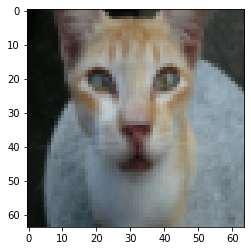

In [10]:
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[index]) + ". It's a " + classes[train_y[index]].decode("utf-8") +  " picture.")

## 2.4 Redimensionemos y escalemos los datos

<p align="center"><img src="https://drive.google.com/uc?id=1PDP1Enup0a3_S0sTrAKPtDqMeurByOJj" title="reshape2vector" width="500" align="center" /></p> 

In [11]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (209, 12288)
test_x's shape: (50, 12288)


# 2.5 Creemos el modelo de una neurona

<p align="center"><img src="https://drive.google.com/uc?id=1IAGokghb1uFh8WK04i4tZWMbExlEb7cH" title="reshape2vector" width="500" align="center" /></p> 

In [12]:
def cat_single_model(x_train,y_train,epochs):
    """
    Crea un modelo para predecir si la imagen corresponde a un gato

    Parametros
    ----------
    x_train: arreglo de numpy
      datos de entrenamiento (imagenes)
    y_train: arreglo de numpy
      Etiquetas de los datos de entrenamiento

    Resultado
    ---------
    model: Modelo de Tensorflow
      Modelo desarrollado para predecir precios de casas
    """
    model = tf.keras.Sequential()
    model.add( tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid,input_shape=x_train[0].shape) )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train,y_train,epochs=epochs)
    return model

mymodel = cat_single_model(x_train=train_x,y_train=train_y,epochs=500)
mymodel.summary()

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.5789
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.6459
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.6651
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7033
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7177
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7656
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7703
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.7751
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7608
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.7895
Epoch 11/500
7/7 [===========

# 2.6 Veamos que predice nuestro modelo

In [13]:
test_loss, test_acc = mymodel.evaluate(test_x, test_y)
print("Test accuracy: %.4f" % test_acc)

2/2 [==============================] - 0s 3ms/step - loss: 1.4287 - accuracy: 0.7200
Test accuracy: 0.7200


In [14]:
predictions = mymodel.predict(test_x)

In [15]:
rounded_predictions = np.round(predictions).astype(int)

Prediction: y = [1]
Your single model predicts a "cat picture.


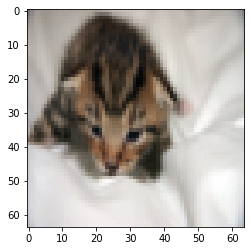

In [16]:
index = 1
plt.imshow(test_x_orig[index])
print ("Prediction: y = " + str(rounded_predictions[index]) )
print("Your single model predicts a \"" + classes[rounded_predictions[index][0]].decode("utf-8") +  " picture.")

## 2.7 Evaluemos el modelo

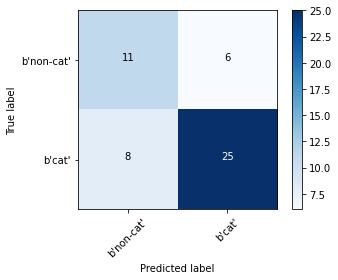

In [17]:
cm = confusion_matrix(y_true= test_y, y_pred = np.squeeze(rounded_predictions))
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marcks = np.arange((len(classes)))
plt.xticks(tick_marcks,classes,rotation=45)
plt.yticks(tick_marcks,classes)

thresh = cm.max()/2
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,cm[i,j],horizontalalignment="center",
           color="white" if cm[i,j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# 3. Sería interesante que probarán qué tanto les mejora el modelo adicionandole más capas y más neuronas. 

<p align="center"><img src="https://drive.google.com/uc?id=1ICjdnHl8Dk8Q3YzUZK6s4VZhBpZX9SDq" title="reshape2vector" width="500" align="center" /></p> 

# 4. MOTIVACIÓN: Redes neuronales convolucionales: Detección de evento sísmico

Referencia: https://github.com/martijnende/ICTP_EQ_tutorials/blob/master/ML/3_event_detection_answers.ipynb

## 4.1 Cargar datos

In [18]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import gzip
import pickle


def load_data(dataset_folder):
    with gzip.GzipFile(f"{dataset_folder}/AE_data.tar.gz", "r") as f:
        data = pickle.load(f)
    return data["train_data"], data["train_labels"], data["test_data"], data["test_labels"]

dataset_folder = "/content/drive/Shareddrives/2.M-Geofisica/3.Semestre_II/clase_geoinformatica/chapters_lab/IA/dataset"
# Load the dataset
train_signals, train_labels, test_signals, test_labels = load_data(dataset_folder)

# For convolutional layers, an additional dimension needs to be added
train_signals = np.expand_dims(train_signals, 2)
test_signals = np.expand_dims(test_signals, 2)

print(train_signals.shape, test_signals.shape)

(1440, 1024, 1) (360, 1024, 1)


## 4.2 Exploración de datos

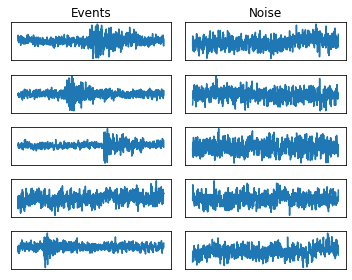

In [19]:

# Select training signals of events
events = (train_labels == 1)
event_signals = train_signals[events][:5].reshape((5, -1))

# Select training signals of noise (no events)
noise_signals = train_signals[~events][:5].reshape((5, -1))

# Plot 5 examples of events and noise
for i in range(5):
    # Events
    plt.subplot(5, 2, 1+2*i)
    if i == 0:
        plt.title("Events")
    plt.plot(event_signals[i])
    plt.xticks([])
    plt.yticks([])
    
    # Noise
    plt.subplot(5, 2, 2+2*i)
    if i == 0:
        plt.title("Noise")
    plt.plot(noise_signals[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# 4.3 Creación del modelo

In [20]:
# Keras default initialiser = glorot_uniform
# A better initialiser for ReLU activations = he_normal
initializer = "he_normal"
# initializer = "glorot_uniform"

model = keras.Sequential([
    # Insert your architecture here
    # Examples of layers you could include:
    #
    # Fully-connected:  keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer)
    # Convolutional:    keras.layers.Conv1D(64, kernel_size=5, activation=tf.nn.relu, kernel_initializer=initializer, padding="same")
    # Max pooling:      keras.layers.MaxPooling1D()
    # Flattening:       keras.layers.Flatten()
    #
    
    # Output layer: 1 output, sigmoid activation
    keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer, input_shape=train_signals[0].shape),
    keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
    keras.layers.MaxPooling1D(),
    keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
    keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
    keras.layers.MaxPooling1D(),
    keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
    keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
    keras.layers.MaxPooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation=tf.nn.relu, kernel_initializer=initializer),
    keras.layers.Dense(1, activation=tf.nn.sigmoid, kernel_initializer="glorot_normal")
])

# Compile and print a summary
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1024, 16)          96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1024, 16)          1296      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 512, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 512, 16)           1296      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 512, 16)           1296      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 256, 16)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 256, 16)          

## 4.4 Entrenamiento

In [21]:
model.fit(
    train_signals, 
    train_labels, 
    validation_data=(test_signals, test_labels),
    verbose=1,
    epochs=10)

Epoch 1/10
45/45 [==============================] - 3s 71ms/step - loss: 0.6918 - accuracy: 0.5104 - val_loss: 0.6729 - val_accuracy: 0.5083
Epoch 2/10
45/45 [==============================] - 3s 67ms/step - loss: 0.6713 - accuracy: 0.6167 - val_loss: 0.6182 - val_accuracy: 0.7611
Epoch 3/10
45/45 [==============================] - 3s 68ms/step - loss: 0.6063 - accuracy: 0.7167 - val_loss: 0.5440 - val_accuracy: 0.7611
Epoch 4/10
45/45 [==============================] - 3s 68ms/step - loss: 0.5780 - accuracy: 0.7410 - val_loss: 0.5250 - val_accuracy: 0.7806
Epoch 5/10
45/45 [==============================] - 3s 68ms/step - loss: 0.5203 - accuracy: 0.7785 - val_loss: 0.4975 - val_accuracy: 0.8306
Epoch 6/10
45/45 [==============================] - 3s 69ms/step - loss: 0.5080 - accuracy: 0.7917 - val_loss: 0.4901 - val_accuracy: 0.8278
Epoch 7/10
45/45 [==============================] - 3s 69ms/step - loss: 0.4577 - accuracy: 0.8222 - val_loss: 0.4313 - val_accuracy: 0.8361
Epoch 8/10
45

## 4.5 Prediccion

In [22]:
test_loss, test_acc = model.evaluate(test_signals, test_labels)
print("Test accuracy: %.4f" % test_acc)

12/12 [==============================] - 0s 19ms/step - loss: 0.4574 - accuracy: 0.8222
Test accuracy: 0.8222


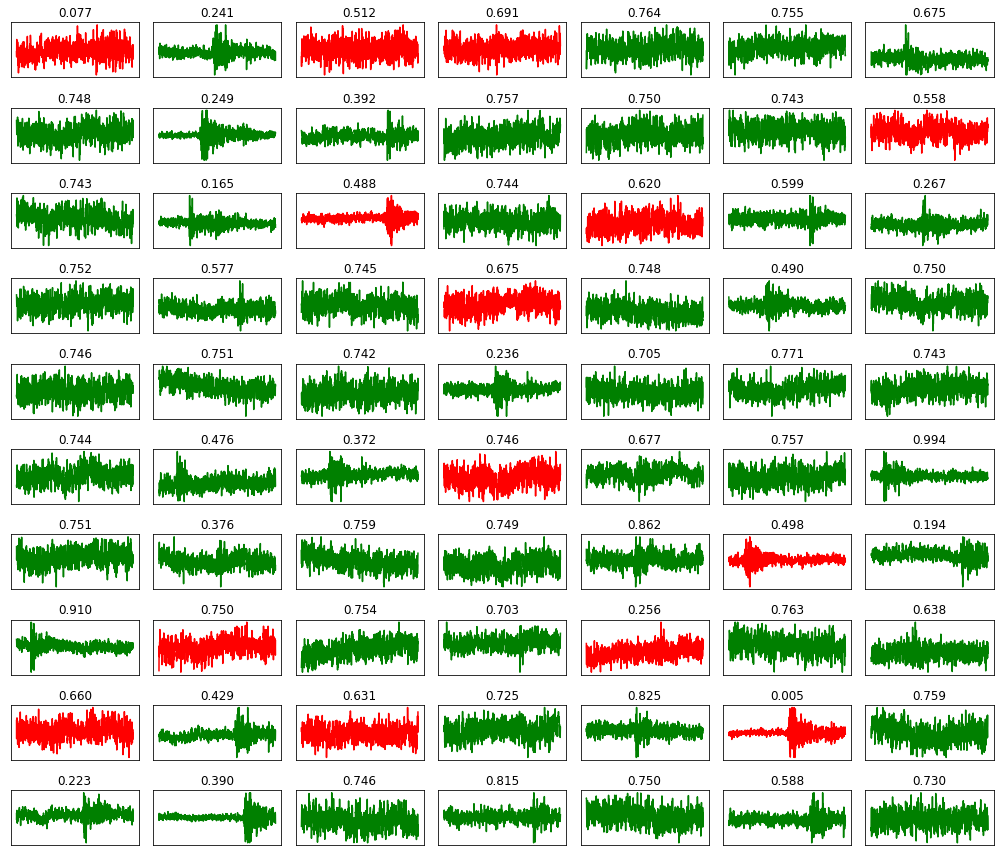

In [23]:
predictions = model.predict(test_signals)
confidence = 2 * np.abs(predictions - 0.5)
predictions = np.round(predictions).astype(int)


fig = plt.figure(figsize=(14, 12))

# Plot 70 examples of events and noise
for i in range(10):
    for j in range(7):
        n = 7*i + j
        # Events
        plt.subplot(10, 7, 1+n)
        if predictions[n] == test_labels[n]:
            colour = "g"
        else:
            colour = "r"
        plt.plot(test_signals[n], c=colour)
        plt.xticks([])
        plt.yticks([])
        plt.title("%.3f" % confidence[n])

plt.tight_layout()
plt.show()